In [79]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

# import models
import spiking

In [123]:
def plot_comparisons(original, masked, flipped, title_masked, title_flipped):

    fig, axes = plt.subplots(1, 3, figsize=(6, 10))

    # Original stored image
    axes[0].imshow(original.reshape(32, 32), cmap='gray')
    axes[0].axis('off')

    # Corrupted image
    axes[1].imshow(masked.reshape(32, 32), cmap='gray')
    axes[1].axis('off')

    # Retrieved image
    axes[2].imshow(flipped.reshape(32, 32), cmap='gray')
    axes[2].axis('off')

    # Add row titles
    axes[0].set_title("Original", loc='center')
    axes[1].set_title(title_masked, loc='center')
    axes[2].set_title(title_flipped, loc='center')

    plt.show()

In [124]:
def plot_spikes(data, title):
    plt.eventplot(data, colors="black", linelengths=2, orientation="vertical")
    plt.ylim(0, 1024)
    plt.title(title)
    plt.xlabel("Time (ms)")
    plt.ylabel("Neuron #")
    plt.show()

In [125]:
# load training data
stored_images = np.load("data/binarized/train_images.npy")
masked_images = np.load("data/binarized/masked_images.npy")
flipped_images = np.load("data/binarized/flipped_images.npy")

In [126]:
importlib.reload(spiking)

spyking_model = spiking.SpikingHN(N=1024)

num_patterns = 15

# randomly select from training set
idxs = np.random.choice(range(len(stored_images)), size=num_patterns, replace=False)
spyking_patterns = stored_images[idxs]
spyking_masked = masked_images[idxs]
spyking_flipped = flipped_images[idxs]

spyking_model.train(spyking_patterns)

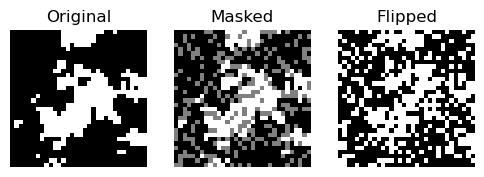

In [ ]:
# Plot masked and flipped image example
plot_comparisons(spyking_patterns[0], spyking_masked[0], spyking_flipped[0],
    "Masked", "Flipped")

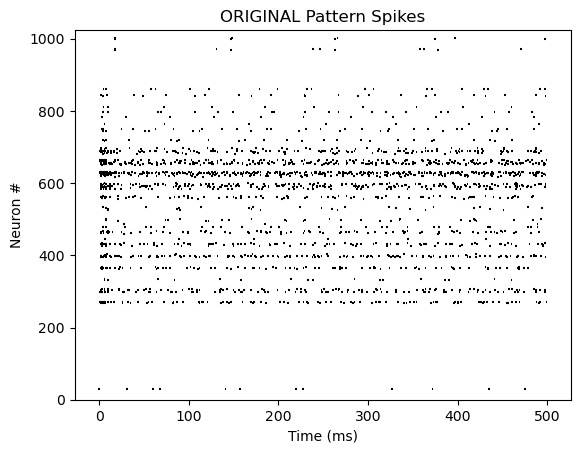

In [ ]:
# ORIGINAL PATTERN
firings = spyking_model.forward(spyking_patterns[0])
plot_spikes(firings, "ORIGINAL Pattern Spikes")

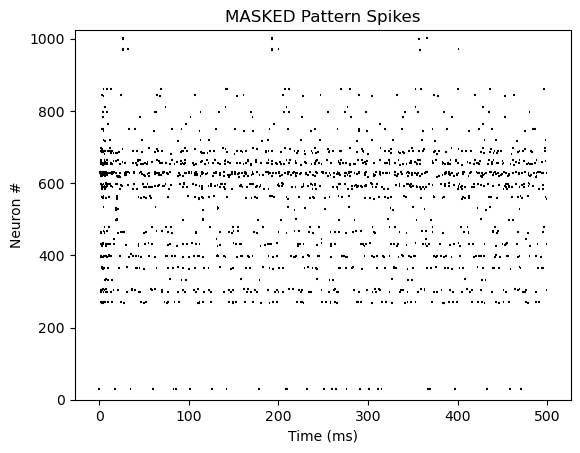

In [ ]:
# MASKED PATTERN
firings = spyking_model.forward(spyking_masked[0])
plot_spikes(firings, title="MASKED Pattern Spikes")

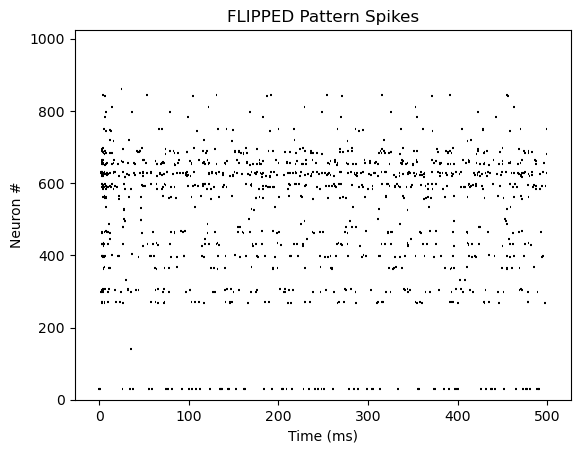

In [ ]:
# FLIPPED PATTERN
firings = spyking_model.forward(spyking_flipped[0])
plot_spikes(firings, "FLIPPED Pattern Spikes")